In [136]:
import matplotlib.pyplot as plt
import pandas as pd 
import config
from matplotlib import colormaps

CSV format: `algorithm, type, speed, speed_iterations, memory, memory_iterations, audio_length, sample_rate, factor`

algorithm - name of the algorithm (str)  
type - PS/TSM (str)   
speed - time in seconds  
speed_iterations - number of iterations for measuring speed  
memory - peak memory allocated in bits  
memory_iterations - number of iterations for measuring memory  
audio_length - length of audio sample in seconds  
sample_rate - sample rate of the audio sample  
factor - tsm or ps factor  

In [137]:
cmap = colormaps.get_cmap('Pastel1')
colors = cmap.colors

data = f"{config.EVAL_OBJ_DIR}/performance/performance_2504091009.csv"
df = pd.read_csv(data)

df['memory'] = df['memory'] / (1024 * 1024) # change memory usage to MB

df_ps = df[df['type'] == 'PS']
df_tsm = df[df['type'] == 'TSM']

### Average Speed and Memory

In [138]:
# Calculate average speed for PS and TSM separately
avg_speed_ps = df_ps.groupby(['algorithm'])['speed'].mean().reset_index()
avg_speed_tsm = df_tsm.groupby(['algorithm'])['speed'].mean().reset_index()

# Calculate average speed for PS and TSM separately
avg_memory_ps = df_ps.groupby(['algorithm'])['memory'].mean().reset_index()
avg_memory_tsm = df_tsm.groupby(['algorithm'])['memory'].mean().reset_index()

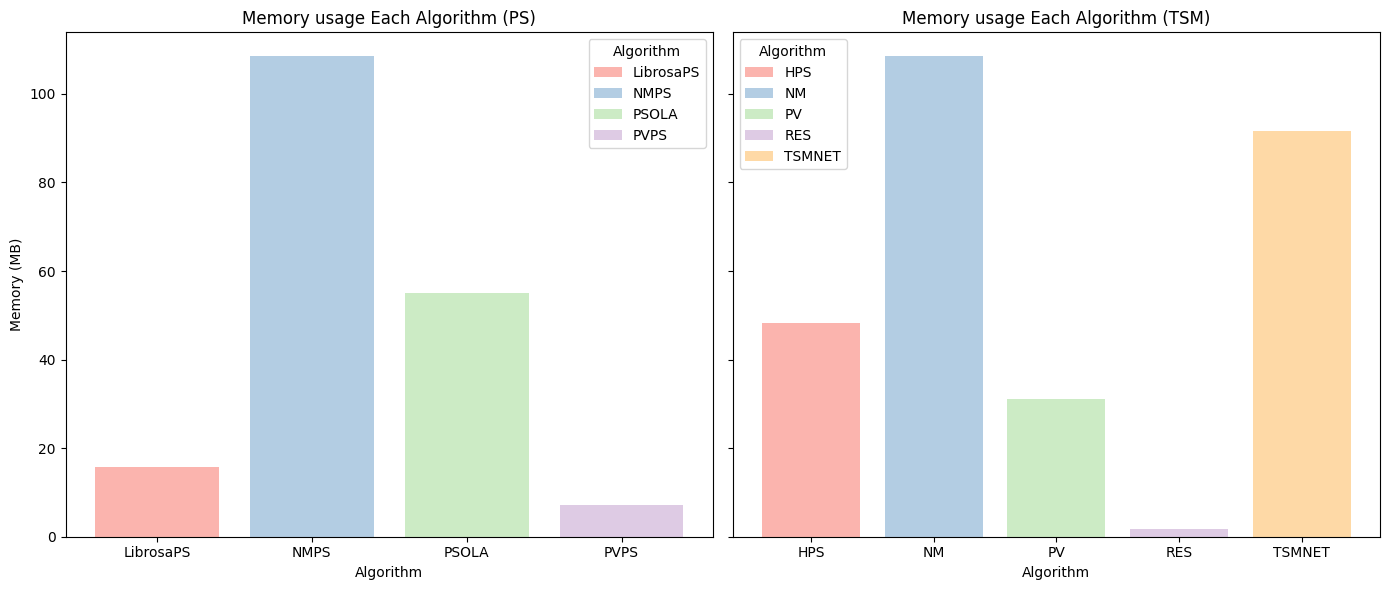

In [139]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

axes[0].bar(avg_memory_ps['algorithm'], avg_memory_ps['memory'], label=avg_memory_ps['algorithm'], color=colors)
axes[0].set_title('Memory usage Each Algorithm (PS)')
axes[0].set_xlabel('Algorithm')
axes[0].set_ylabel('Memory (MB)')
axes[0].legend(title='Algorithm')

axes[1].bar(avg_memory_tsm['algorithm'], avg_memory_tsm['memory'], label=avg_memory_tsm['algorithm'], color=colors)
axes[1].set_title('Memory usage Each Algorithm (TSM)')
axes[1].set_xlabel('Algorithm')
axes[1].legend(title='Algorithm')

plt.tight_layout()
plt.show()


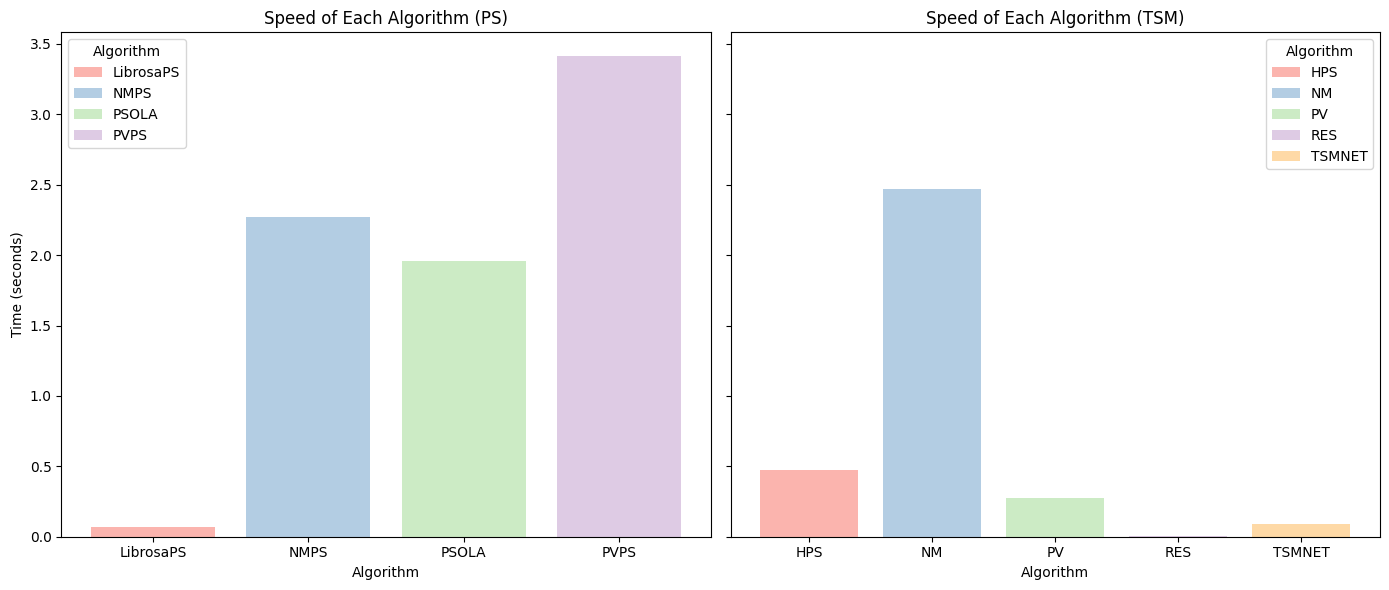

In [140]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

axes[0].bar(avg_speed_ps['algorithm'], avg_speed_ps['speed'], label=avg_speed_ps['algorithm'], color=colors)
axes[0].set_title('Speed of Each Algorithm (PS)')
axes[0].set_xlabel('Algorithm')
axes[0].set_ylabel('Time (seconds)')
axes[0].legend(title='Algorithm')

axes[1].bar(avg_speed_tsm['algorithm'], avg_speed_tsm['speed'], label=avg_speed_tsm['algorithm'], color=colors)
axes[1].set_title('Speed of Each Algorithm (TSM)')
axes[1].set_xlabel('Algorithm')
axes[1].legend(title='Algorithm')

plt.tight_layout()
plt.show()


### Audio Length vs Speed and Memory

In [141]:
# Calculate average speed for PS and TSM separately
avg_speed_ps = df_ps.groupby(['algorithm', 'audio_length'])['speed'].mean().reset_index()
avg_speed_tsm = df_tsm.groupby(['algorithm', 'audio_length'])['speed'].mean().reset_index()

# Calculate average speed for PS and TSM separately
avg_memory_ps = df_ps.groupby(['algorithm', 'audio_length'])['memory'].mean().reset_index()
avg_memory_tsm = df_tsm.groupby(['algorithm', 'audio_length'])['memory'].mean().reset_index()

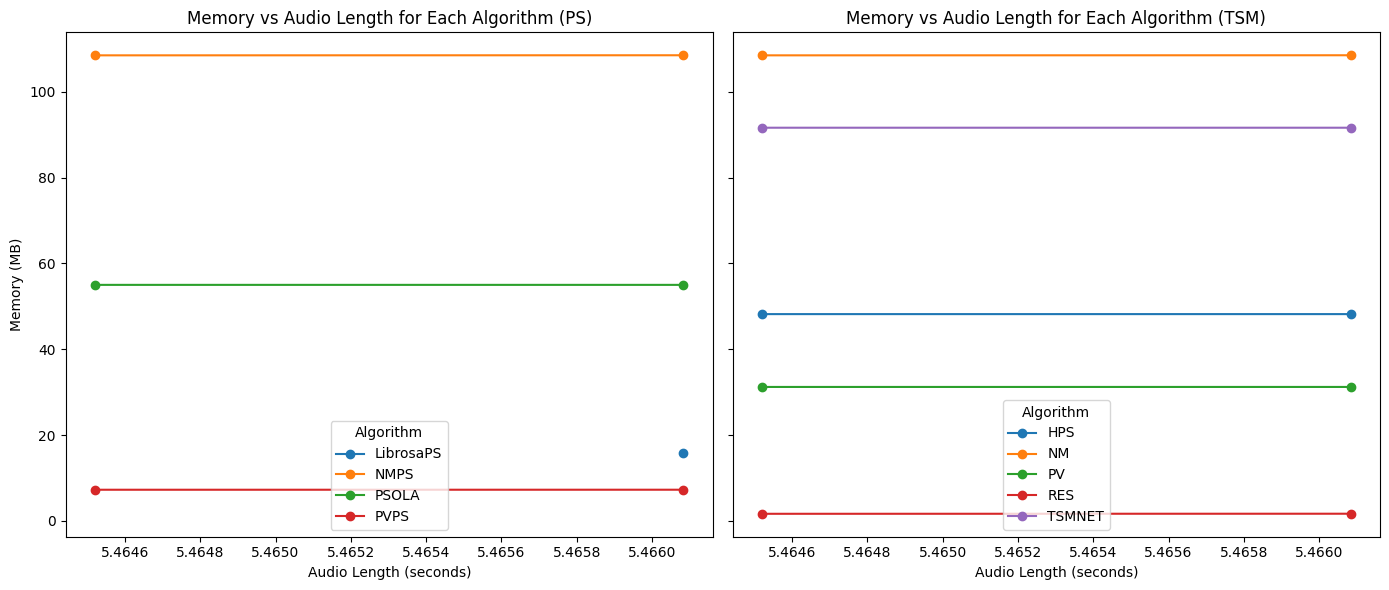

In [142]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Scatter plot for each algorithm in avg_memory_ps
for name, group in avg_memory_ps.groupby('algorithm'):
    axes[0].plot(group['audio_length'], group['memory'], label=name, marker='o')
axes[0].set_title('Memory vs Audio Length for Each Algorithm (PS)')
axes[0].set_xlabel('Audio Length (seconds)')
axes[0].legend(title='Algorithm')
axes[0].set_ylabel('Memory (MB)')

# Scatter plot for each algorithm in avg_memory_tsm
for name, group in avg_memory_tsm.groupby('algorithm'):
    axes[1].plot(group['audio_length'], group['memory'], label=name, marker='o')
axes[1].set_title('Memory vs Audio Length for Each Algorithm (TSM)')
axes[1].set_xlabel('Audio Length (seconds)')
axes[1].legend(title='Algorithm')

plt.tight_layout()
plt.show()

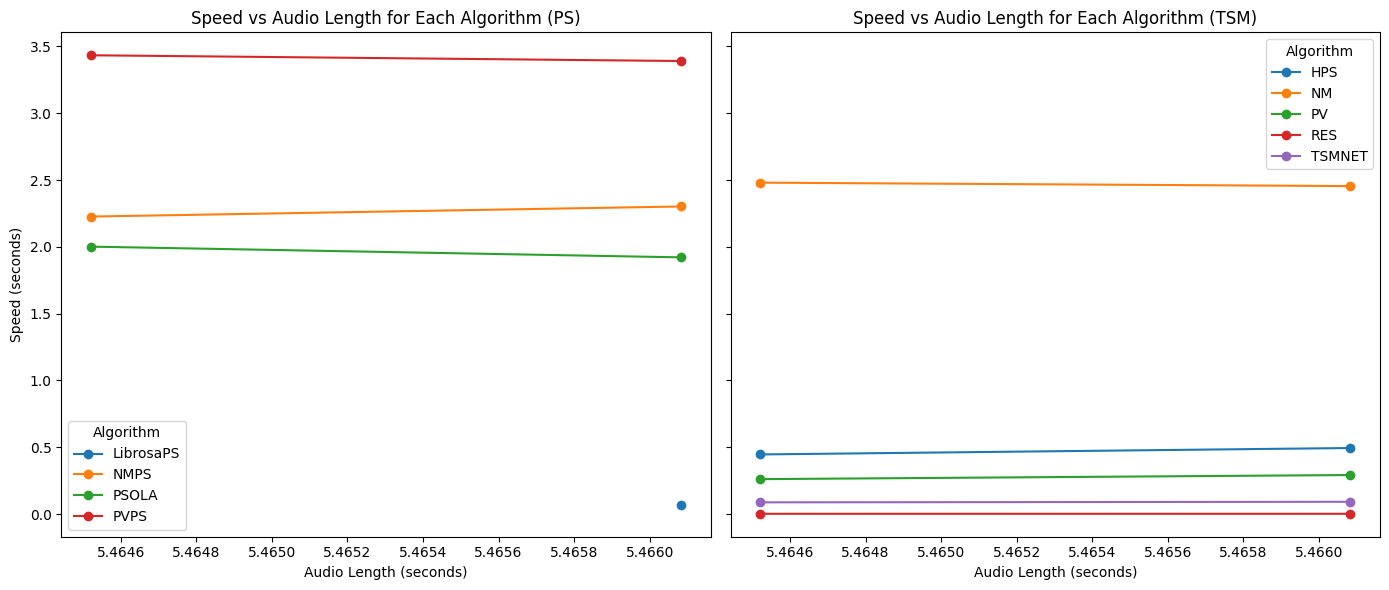

In [143]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Scatter plot for PS data frame grouped by algorithm
for name, group in avg_speed_ps.groupby('algorithm'):
    axes[0].plot(group['audio_length'], group['speed'], label=name, marker='o')
axes[0].set_title('Speed vs Audio Length for Each Algorithm (PS)')
axes[0].set_xlabel('Audio Length (seconds)')
axes[0].set_ylabel('Speed (seconds)')
axes[0].legend(title='Algorithm')

# Scatter plot for TSM data frame grouped by algorithm
for name, group in avg_speed_tsm.groupby('algorithm'):
    axes[1].plot(group['audio_length'], group['speed'], label=name, marker='o')
axes[1].set_title('Speed vs Audio Length for Each Algorithm (TSM)')
axes[1].set_xlabel('Audio Length (seconds)')
axes[1].legend(title='Algorithm')

plt.tight_layout()
plt.show()

### Factor vs Speed and Memory

In [144]:
# Calculate average speed for PS and TSM separately
avg_speed_ps = df_ps.groupby(['algorithm', 'factor'])['speed'].mean().reset_index()
avg_speed_tsm = df_tsm.groupby(['algorithm', 'factor'])['speed'].mean().reset_index()

# Calculate average speed for PS and TSM separately
avg_memory_ps = df_ps.groupby(['algorithm', 'factor'])['memory'].mean().reset_index()
avg_memory_tsm = df_tsm.groupby(['algorithm', 'factor'])['memory'].mean().reset_index()

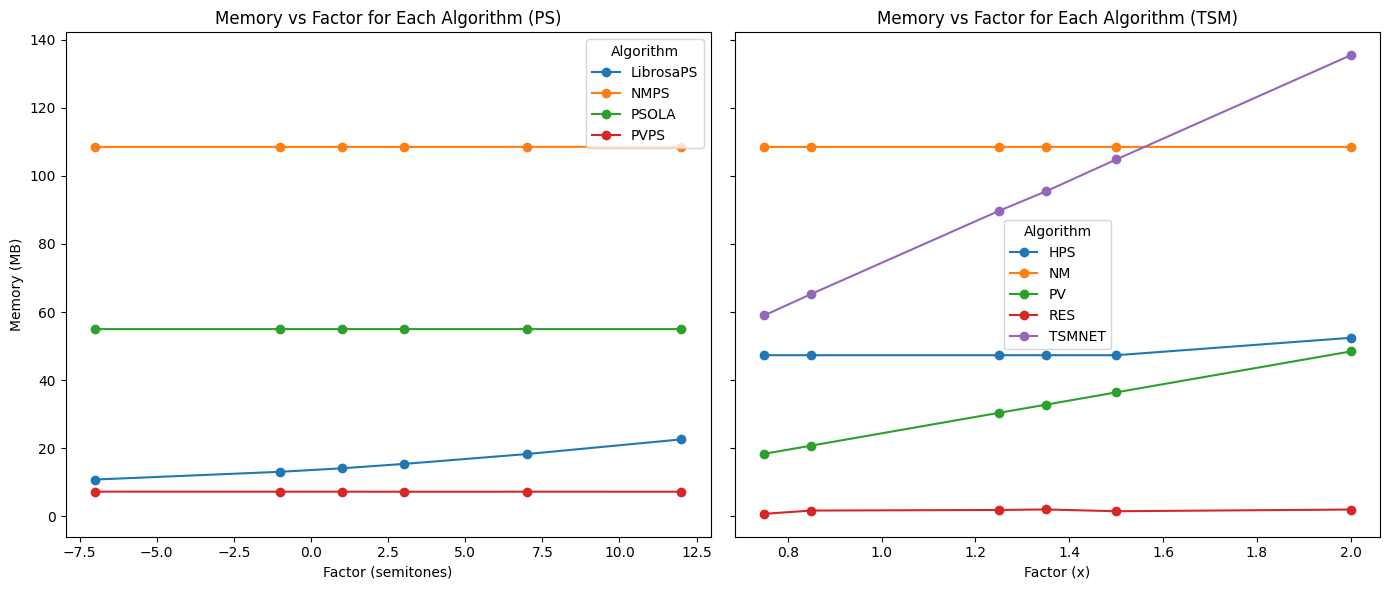

In [145]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Scatter plot for each algorithm in avg_memory_ps
for name, group in avg_memory_ps.groupby('algorithm'):
    axes[0].plot(group['factor'], group['memory'], label=name, marker='o')
axes[0].set_title('Memory vs Factor for Each Algorithm (PS)')
axes[0].set_xlabel('Factor (semitones)')
axes[0].legend(title='Algorithm')
axes[0].set_ylabel('Memory (MB)')

# Scatter plot for each algorithm in avg_memory_tsm
for name, group in avg_memory_tsm.groupby('algorithm'):
    axes[1].plot(group['factor'], group['memory'], label=name, marker='o')
axes[1].set_title('Memory vs Factor for Each Algorithm (TSM)')
axes[1].set_xlabel('Factor (x)')
axes[1].legend(title='Algorithm')

plt.tight_layout()
plt.show()

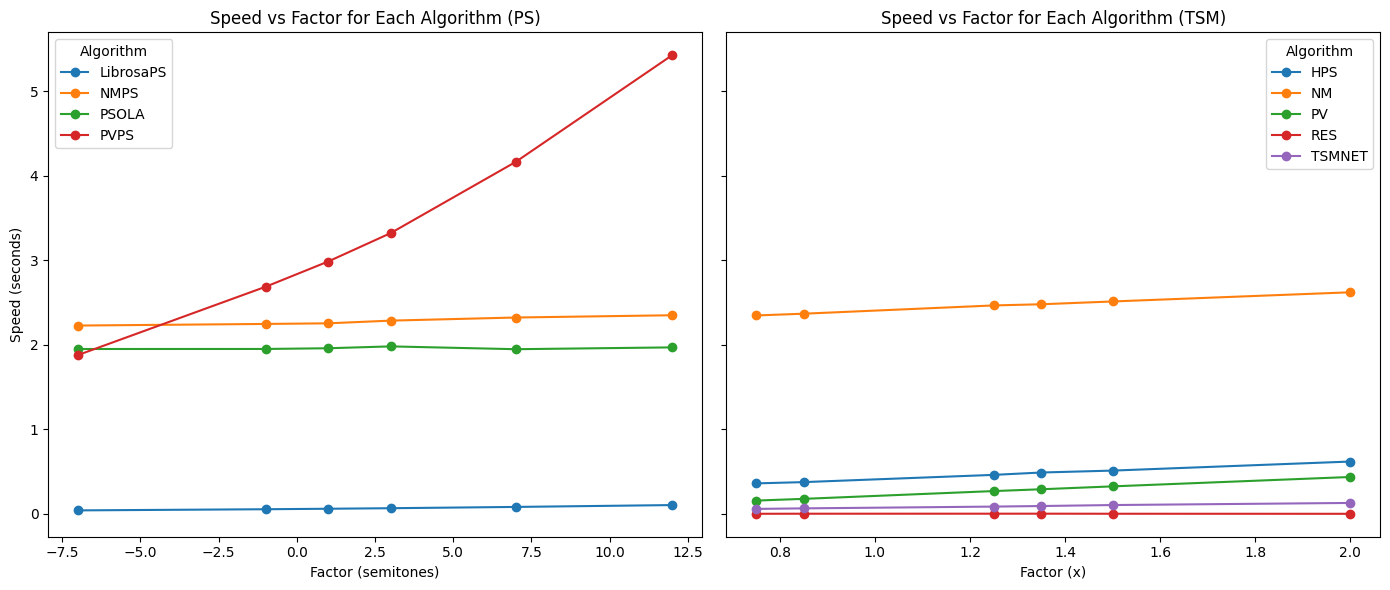

In [146]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Scatter plot for PS data frame grouped by algorithm
for name, group in avg_speed_ps.groupby('algorithm'):
    axes[0].plot(group['factor'], group['speed'], label=name, marker='o')
axes[0].set_title('Speed vs Factor for Each Algorithm (PS)')
axes[0].set_xlabel('Factor (semitones)')
axes[0].set_ylabel('Speed (seconds)')
axes[0].legend(title='Algorithm')

# Scatter plot for TSM data frame grouped by algorithm
for name, group in avg_speed_tsm.groupby('algorithm'):
    axes[1].plot(group['factor'], group['speed'], label=name, marker='o')
axes[1].set_title('Speed vs Factor for Each Algorithm (TSM)')
axes[1].set_xlabel('Factor (x)')
axes[1].legend(title='Algorithm')

plt.tight_layout()
plt.show()

### Peak Memory Usage

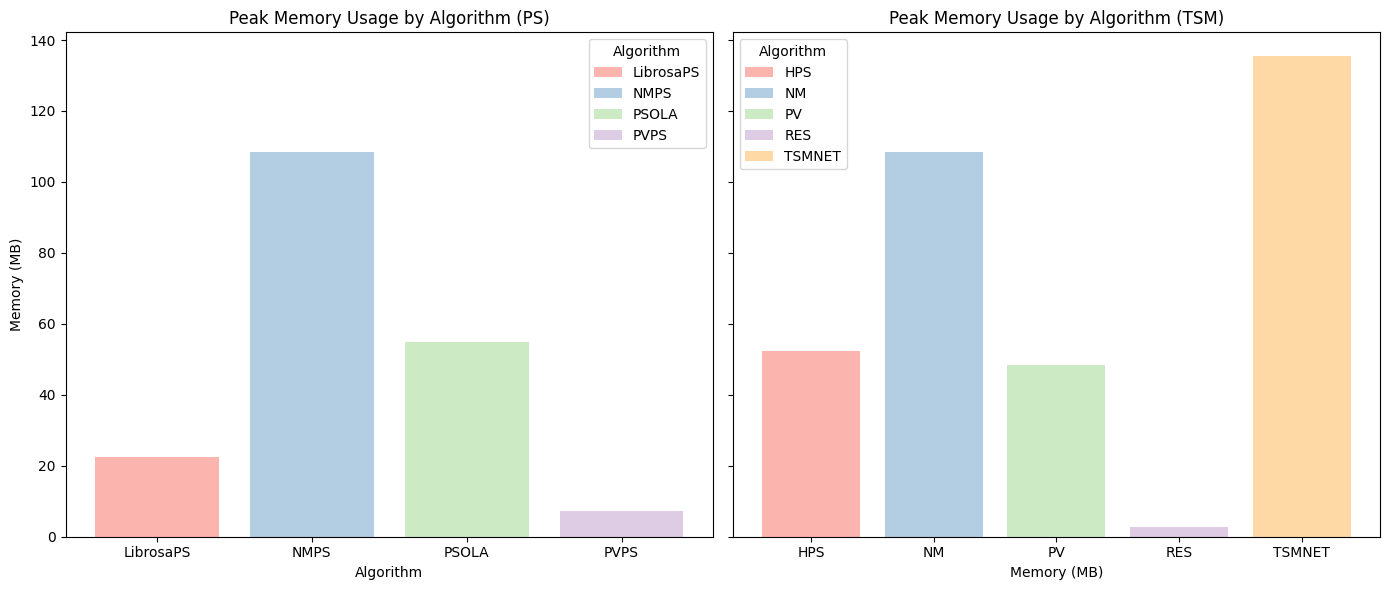

In [147]:
peak_memory_tsm = df_tsm.groupby('algorithm')['memory'].max().reset_index()
peak_memory_ps = df_ps.groupby('algorithm')['memory'].max().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

axes[0].bar(peak_memory_ps['algorithm'], peak_memory_ps['memory'], label=peak_memory_ps['algorithm'], color=colors)
axes[0].set_title('Peak Memory Usage by Algorithm (PS)')
axes[0].set_xlabel('Algorithm')
axes[0].set_ylabel('Memory (MB)')
axes[0].legend(title='Algorithm')

axes[1].bar(peak_memory_tsm['algorithm'], peak_memory_tsm['memory'], label=peak_memory_tsm['algorithm'], color=colors)
axes[1].set_title('Peak Memory Usage by Algorithm (TSM)')
axes[1].set_xlabel('Memory (MB)')
axes[1].legend(title='Algorithm')

plt.tight_layout()
plt.show()

### Speed vs Memory

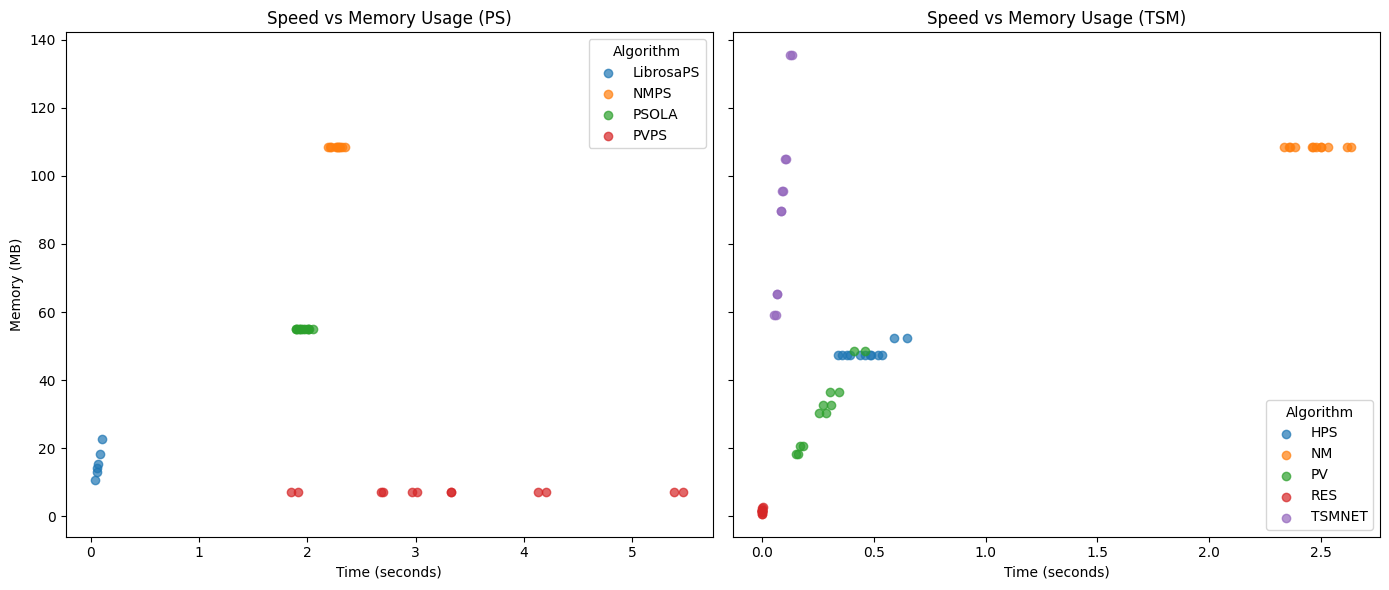

In [148]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Scatter plot for PS data frame grouped by algorithm
for name, group in df_ps.groupby('algorithm'):
    axes[0].scatter(group['speed'], group['memory'], label=name, alpha=0.7)
axes[0].set_title('Speed vs Memory Usage (PS)')
axes[0].set_xlabel('Time (seconds)')
axes[0].set_ylabel('Memory (MB)')
axes[0].legend(title='Algorithm')

# Scatter plot for TSM data frame grouped by algorithm
for name, group in df_tsm.groupby('algorithm'):
    axes[1].scatter(group['speed'], group['memory'], label=name, alpha=0.7)
axes[1].set_title('Speed vs Memory Usage (TSM)')
axes[1].set_xlabel('Time (seconds)')
axes[1].legend(title='Algorithm')

plt.tight_layout()
plt.show()